In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

train = pd.read_csv('train.csv', parse_dates=['dt'])
print(train.shape)
print(train.describe())
train.head()

(8230, 3)
                id       target
count  8230.000000  8230.000000
mean      9.412758   630.998177
std       5.872619   273.025186
min       0.000000   174.300000
25%       4.000000   449.325000
50%       9.000000   580.600000
75%      15.000000   732.800000
max      19.000000  2680.700000


,id,dt,target
0,0,2016-01-02,747.8
1,0,2016-01-03,681.2
2,0,2016-01-04,505.8
3,0,2016-01-06,1078.3
4,0,2016-01-07,961.9


In [3]:
train.set_index(['id', 'dt'], inplace=True)
train.head()

target
id dt                
0  2016-01-02   747.8
   2016-01-03   681.2
   2016-01-04   505.8
   2016-01-06  1078.3
   2016-01-07   961.9

## missing values

In [4]:
train.target.isnull().sum()

0

## distribution plots for target value

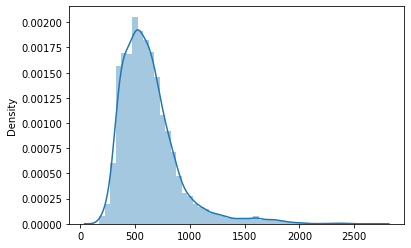

In [10]:
sns.distplot(train.target.values)
plt.show()

## distribution and timelines for particular stores

store=0


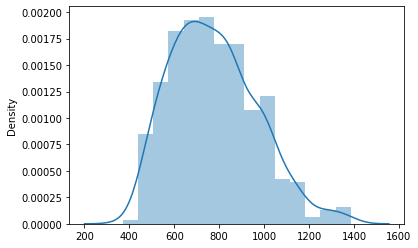

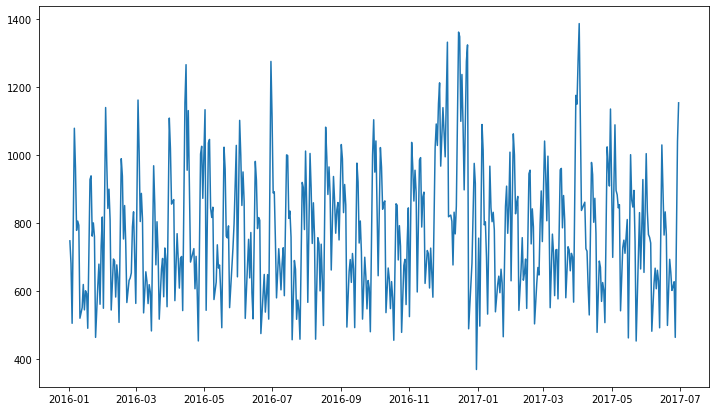

store=1


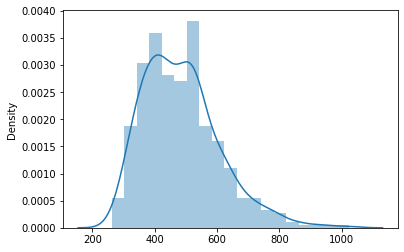

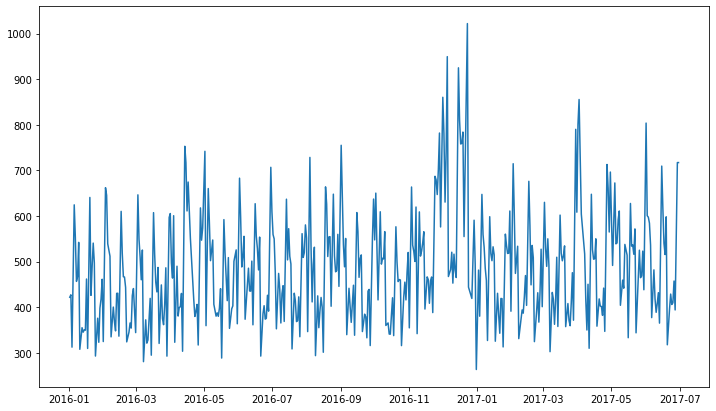

store=2


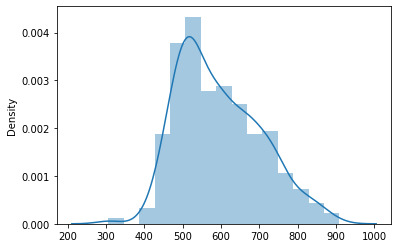

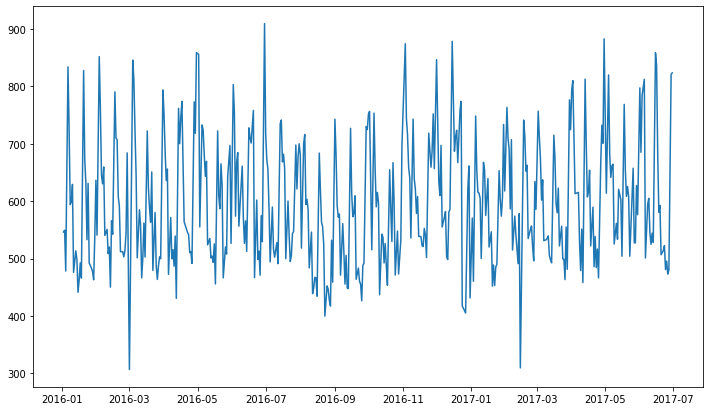

store=3


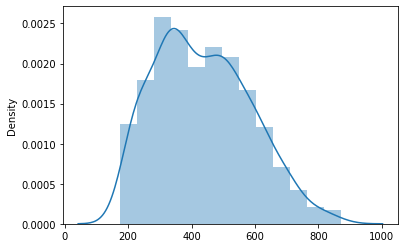

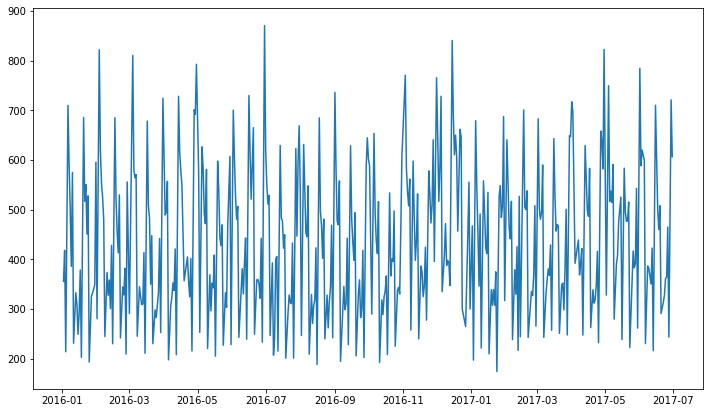

store=4


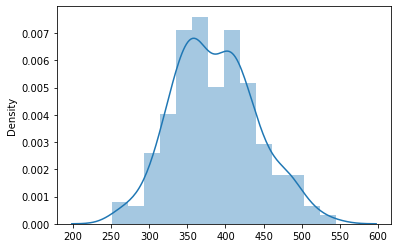

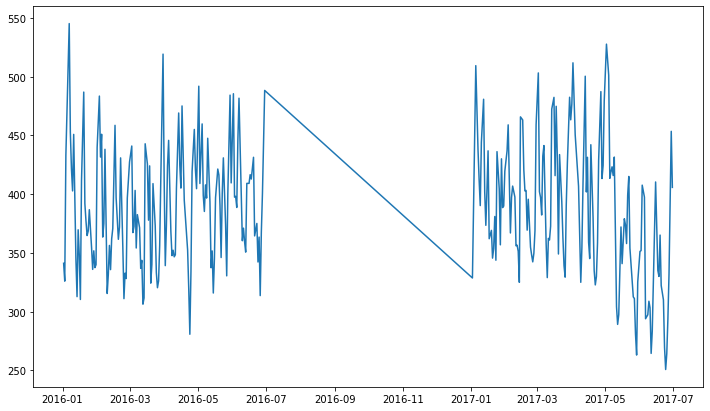

store=5


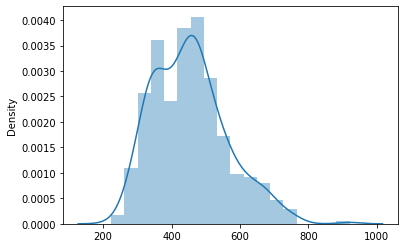

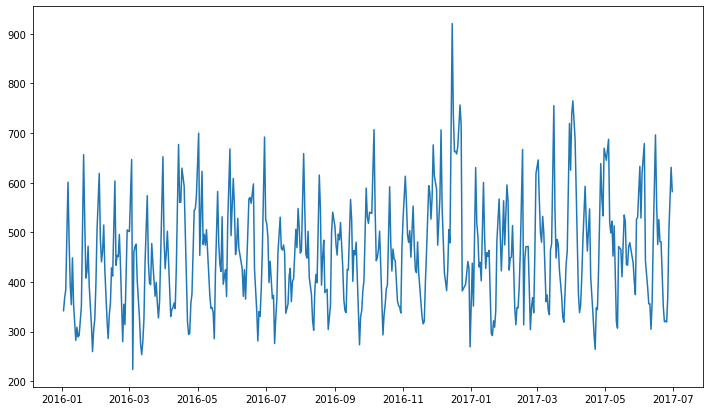

store=6


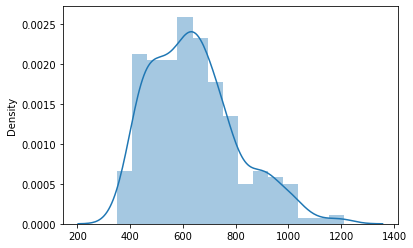

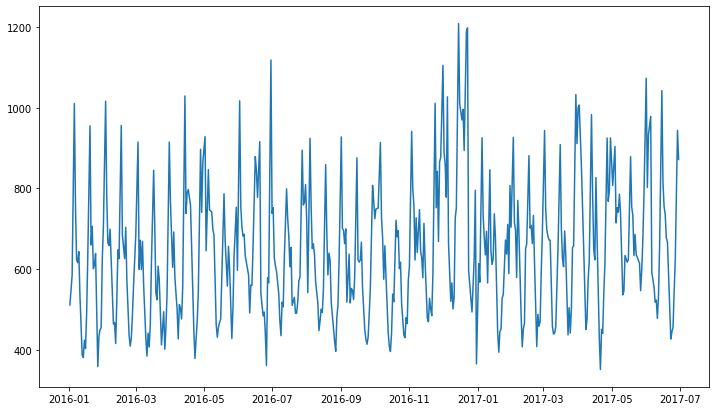

store=7


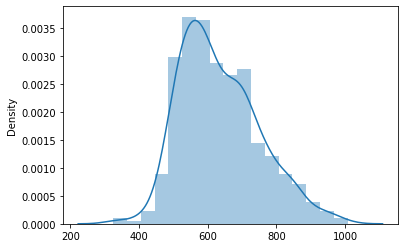

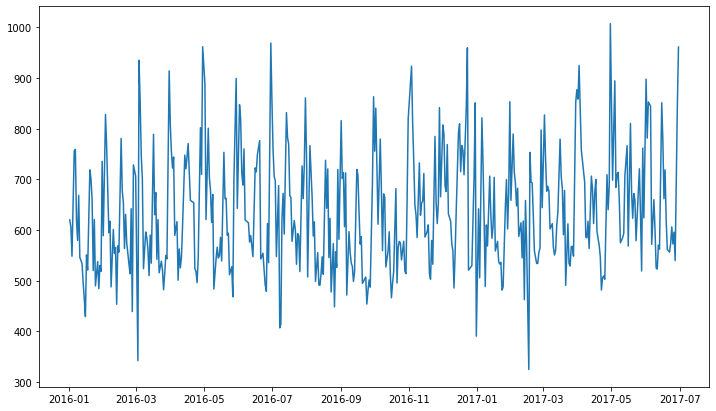

store=8


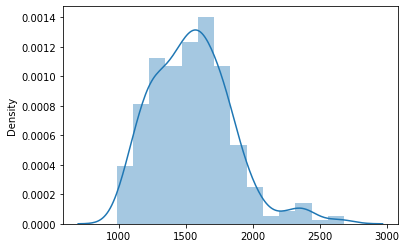

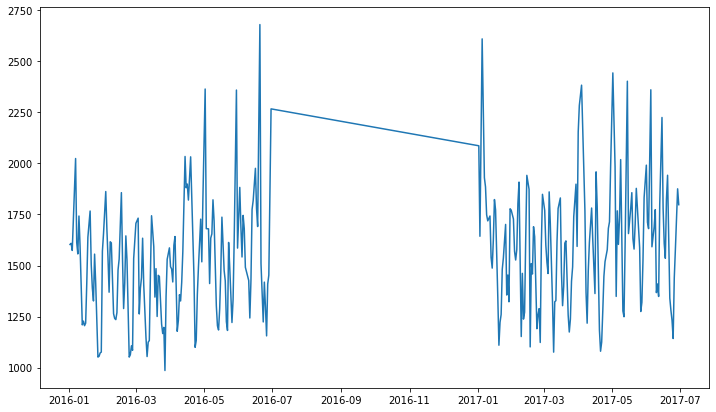

store=9


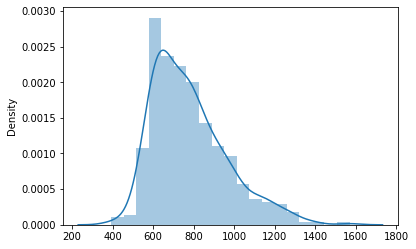

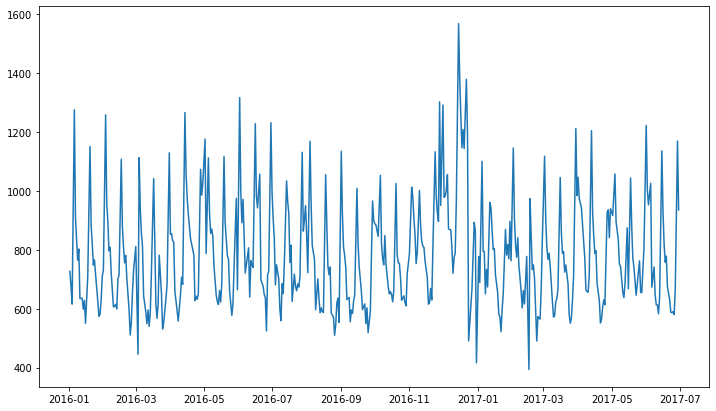

store=10


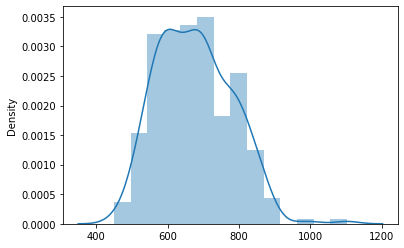

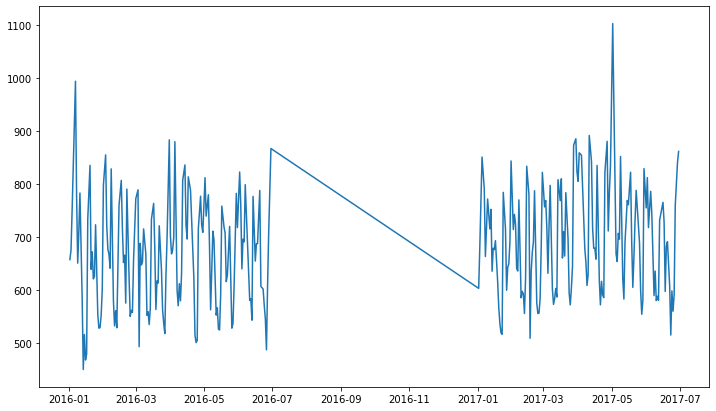

store=11


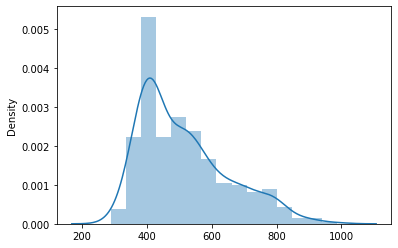

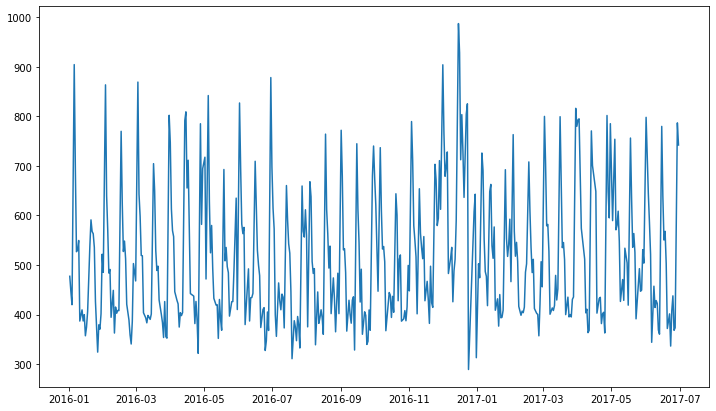

store=12


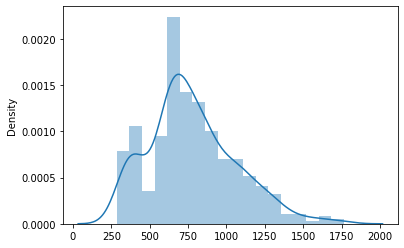

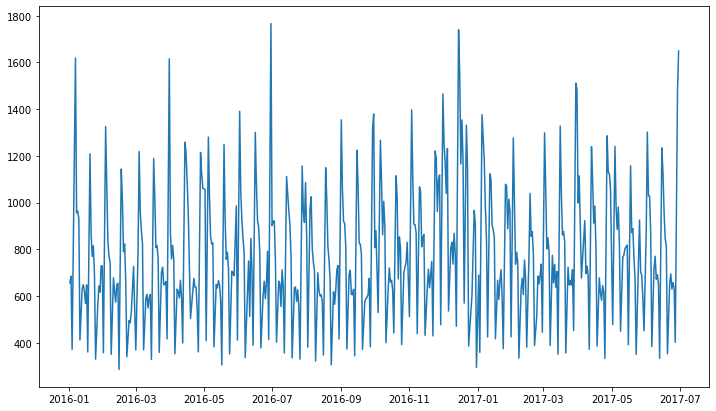

store=13


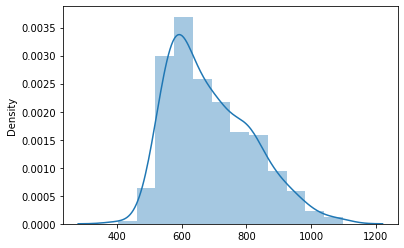

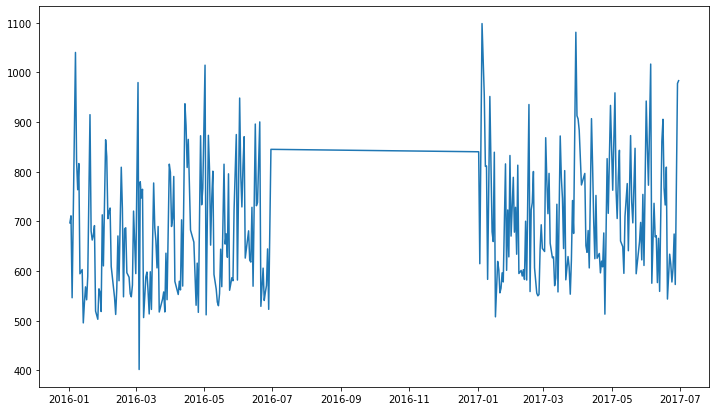

store=14


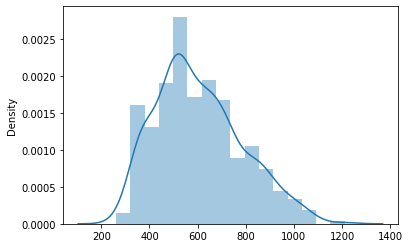

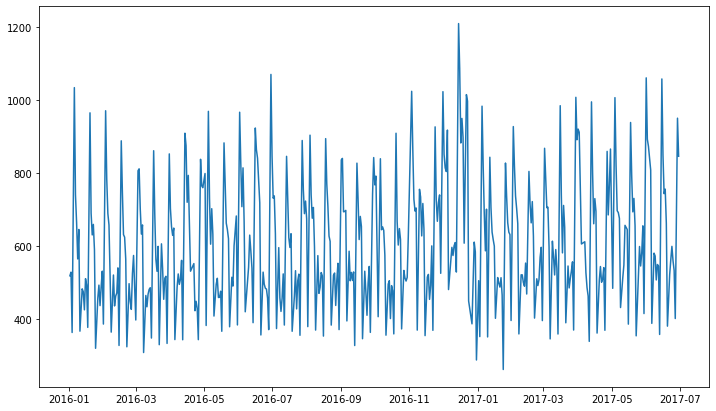

store=15


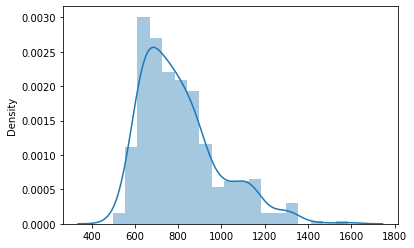

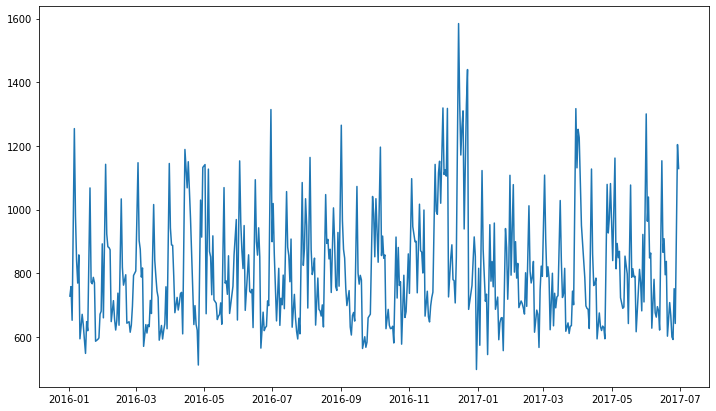

store=16


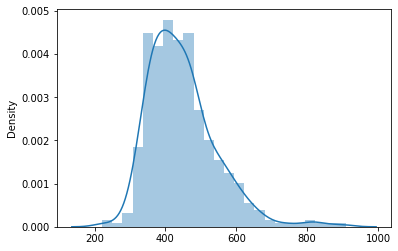

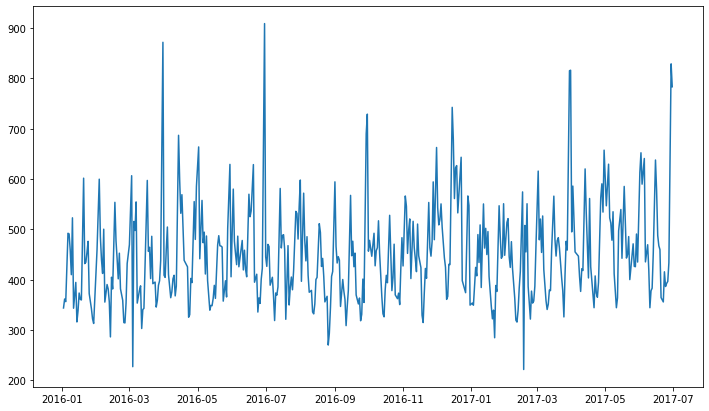

store=17


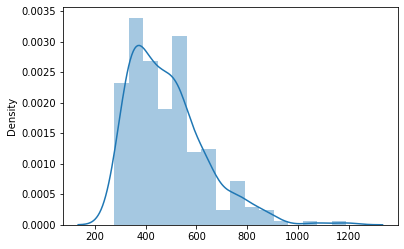

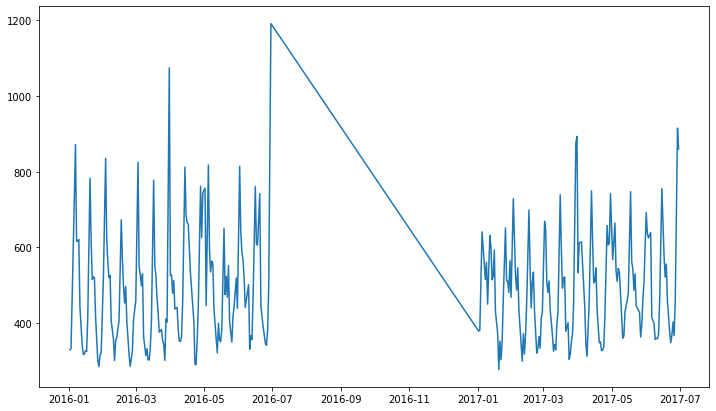

store=18


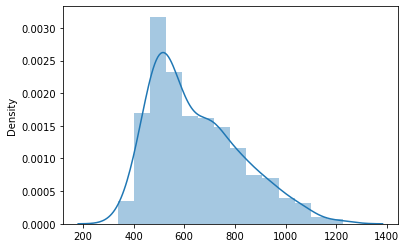

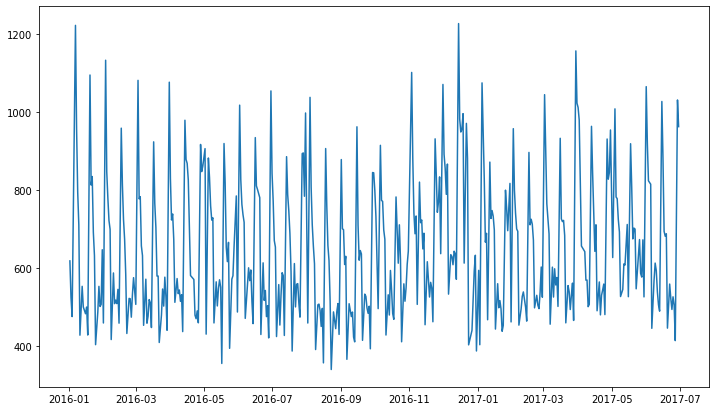

store=19


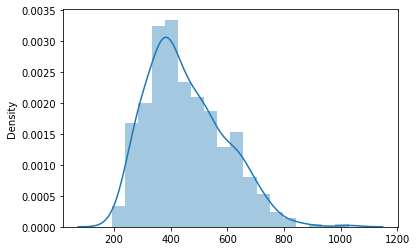

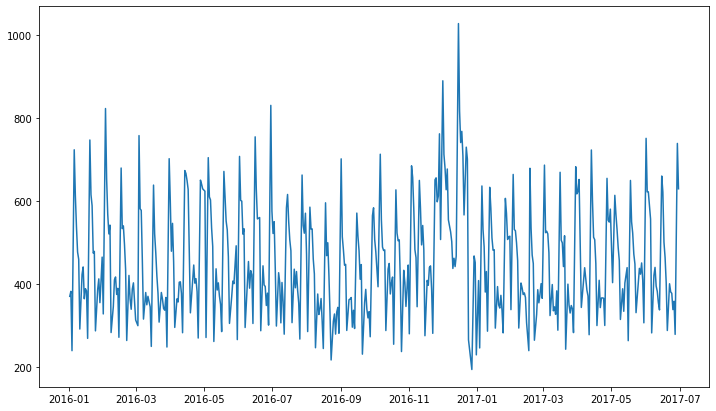

In [22]:
store_ids = set(train.index.get_level_values(level='id'))
for store_id in store_ids:
    print('store=%i' % store_id)
    train_store = train.loc[store_id]
    sns.distplot(train_store.target.values)
    plt.show()
    plt.figure(figsize=(12, 7))
    plt.plot(train_store.target)
    plt.show()



### observation 1
1. trend seem absent (mean is constant) over observable timeframe.
2. two-weeks repeating pattern, with peak approx every 14 days (sunday sales events?), is obvious.
3. the NYE seem to have some impact: large sale in December and less sales (pattern breaks as well) in January.

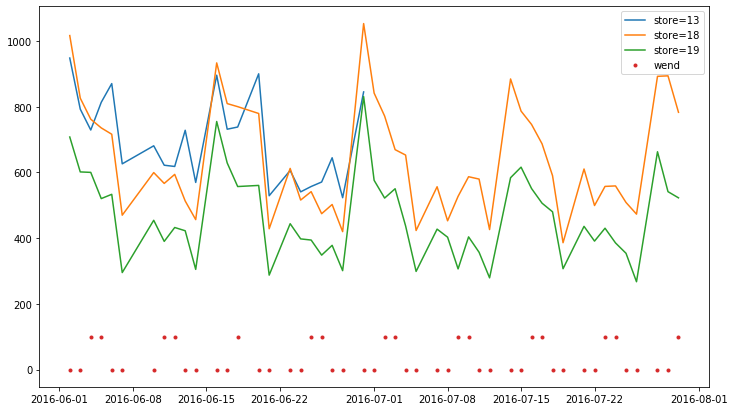

In [9]:
train['dow'] = train.index.get_level_values(level='dt').weekday
train['day'] = train.index.get_level_values(level='dt').day
train['month'] = train.index.get_level_values(level='dt').month
train['wend'] = (train['dow'] >= 5) * 100
plt.figure(figsize=(12, 7))
for store_id in [13, 18, 19]:
    train_store = train.loc[store_id]
    train_interval = train_store[pd.Timestamp('2016-06-01') : pd.Timestamp('2016-07-30')]
    plt.plot(train_interval.target, label='store=%i' % store_id)
plt.plot(train_interval.wend, '.', label='wend')
plt.legend()    
plt.show()

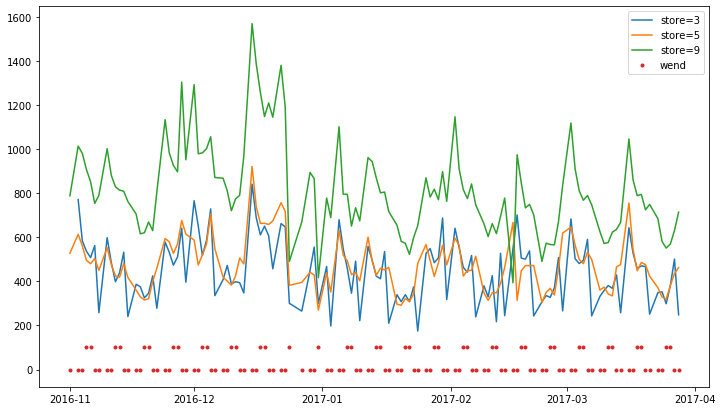

In [17]:
plt.figure(figsize=(12, 7))
for store_id in [3, 5, 9]:
    train_store = train.loc[store_id]
    train_interval = train_store[pd.Timestamp('2016-11-01') : pd.Timestamp('2017-03-28')]
    plt.plot(train_interval.target, label='store=%i' % store_id)
plt.plot(train_interval.wend, '.', label='wend')
plt.legend()    
plt.show()

### observation 2
The distribution is different across the stores. Approaches to handle:
1. per profile models - will need to train separate model if new store enters the cluster.
2. global model with store id as a features - similar problem.
3. mean / std over long historical interval for particular store should work well.

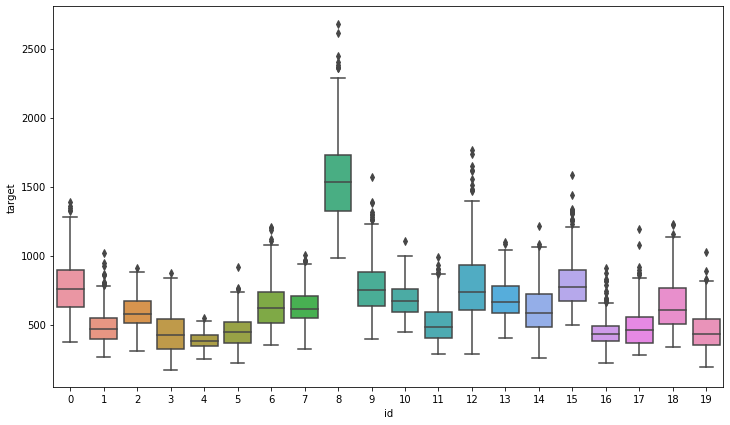

In [34]:
plt.figure(figsize=(12,7))
sns.boxplot(x='id', y='target', data=train.reset_index())
plt.show()

### observation 3
all stores have a day off: Tuesday till 2016-03-02 and Wednesday after 
<br>
there are gaps in the data for few stores

store=17


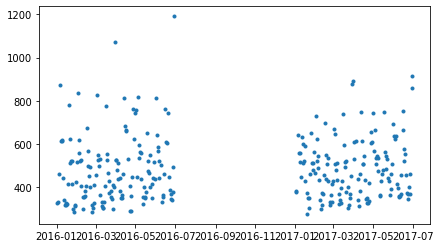

store=13


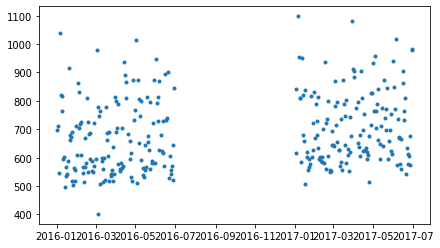

store=10


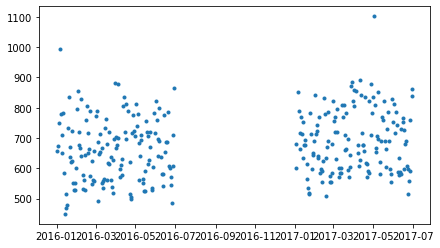

store=8


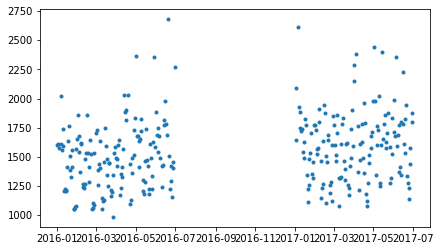

store=4


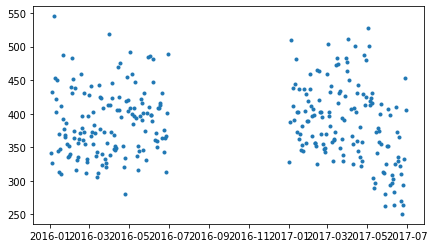

In [53]:
stores_with_gaps = [17, 13, 10, 8, 4]
for store_id in stores_with_gaps:
    print('store=%i' % store_id)
    train_store = train.loc[store_id]
    plt.figure(figsize=(7, 4))
    plt.plot(train_store.target, '.')
    plt.show()

### observation 4
there certainly is the dependency on day of month(sales 10th and 22th?) and probably day of week.
<br>
the correlation to the month number is due to data frame of 1.5 years

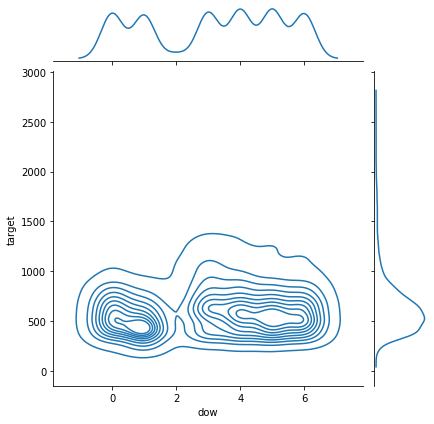

In [7]:
sns.jointplot(x=train['dow'], y=train['target'], kind='kde')

store=3


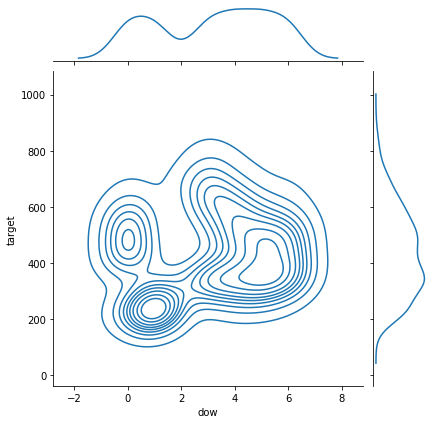

store=7


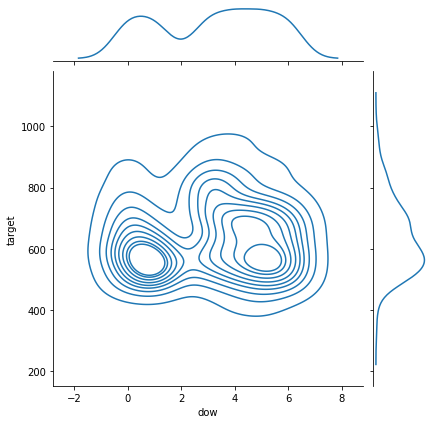

store=12


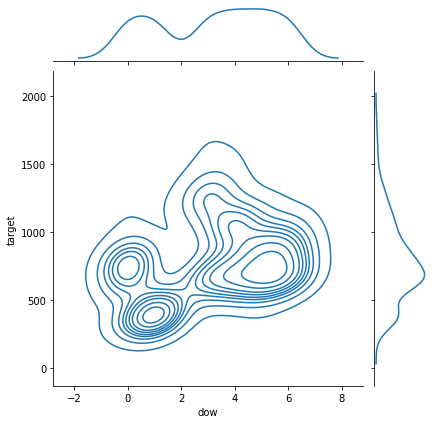

In [8]:
store_ids = set(train.index.get_level_values(level='id'))
for store_id in [3, 7, 12]:
    print('store=%i' % store_id)
    train_store = train.loc[store_id]
    sns.jointplot(x=train_store['dow'], y=train_store['target'], kind='kde')
    plt.show()

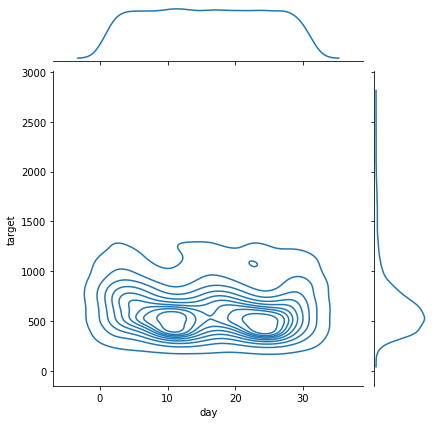

In [11]:
sns.jointplot(x=train['day'], y=train['target'], kind='kde')

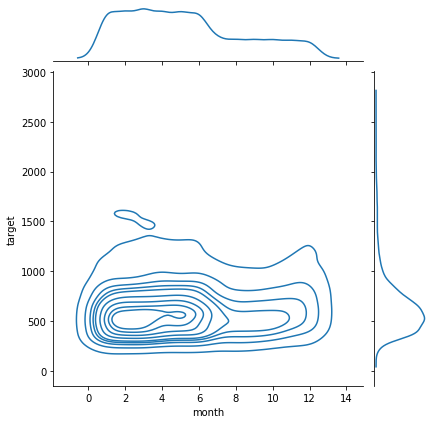

In [12]:
sns.jointplot(x=train['month'], y=train['target'], kind='kde')